<a href="https://colab.research.google.com/github/navaneethakannanindia7/Privacy-Preserving-Customer-churn-Prediction-using-Federated-Learning-on-distributed-Data/blob/main/projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

# Set display options
pd.set_option('display.max_columns', None)
%matplotlib inline

In [7]:
# Load the dataset
df = pd.read_csv('churn.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic information
print("\n Dataset Shape:", df.shape)
print("\n Column Names:")
print(df.columns.tolist())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0        

In [8]:
# Get detailed information about the dataset
print("Dataset Info:")
print(df.info())

print("\n Statistical Summary:")
print(df.describe())

# Check data types
print("\n Data Types:")
print(df.dtypes)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

Missing Values Count:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Missing Values Percentage:
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges      

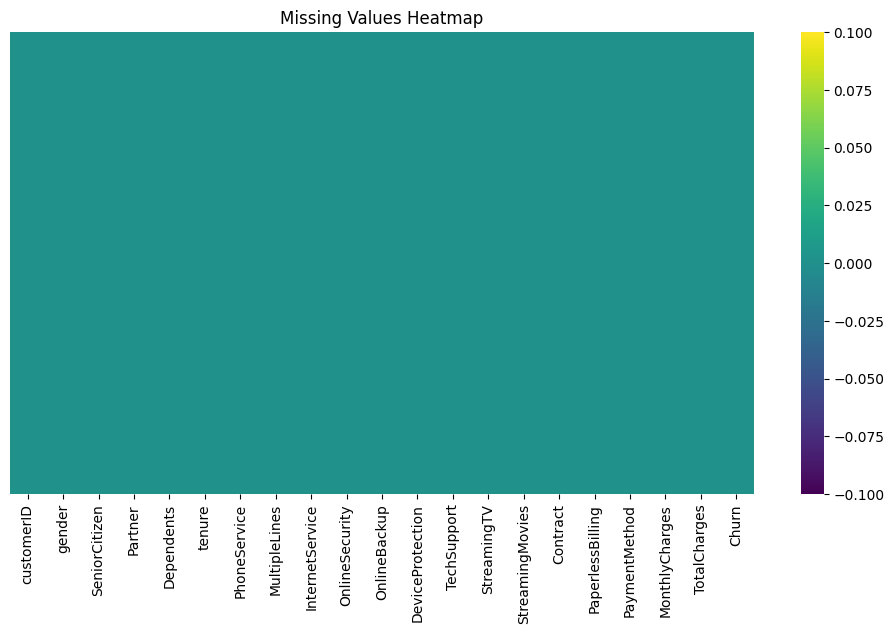

In [9]:
# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())

print("\n Missing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

 Churn Distribution (Percentage):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


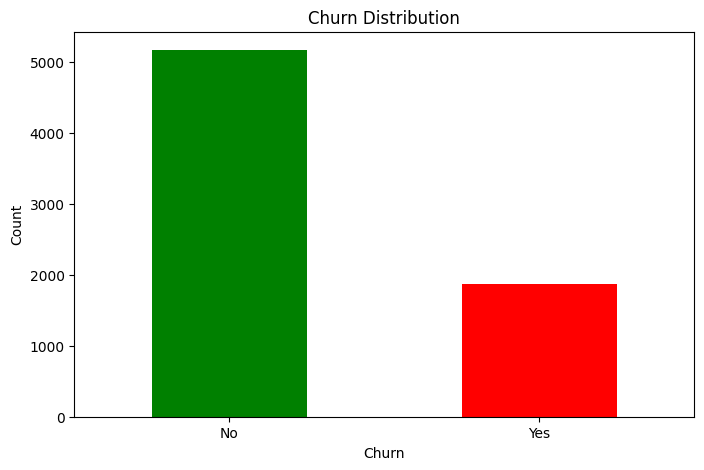

In [10]:
# Check the target variable (Churn column)
print("Churn Distribution:")
print(df['Churn'].value_counts())

print("\n Churn Distribution (Percentage):")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualize churn distribution
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Handle missing values
if 'TotalCharges' in df.columns:
    # Convert to numeric (sometimes it's stored as string)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Fill missing values with median
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# For any other missing values in categorical columns
# Fill with mode (most frequent value)
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':  # Categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:  # Numerical
            df[column].fillna(df[column].median(), inplace=True)

# Verify no missing values remain
print("Missing values after handling:")
print(df.isnull().sum().sum())

Missing values after handling:
0


/tmp/ipython-input-1903670611.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
# Convert Churn column from Yes/No to 1/0
print("Before conversion:")
print(df['Churn'].unique())

# Convert to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("\nAfter conversion:")
print(df['Churn'].unique())
print(df['Churn'].value_counts())

Before conversion:
['No' 'Yes']

After conversion:
[0 1]
Churn
0    5174
1    1869
Name: count, dtype: int64


In [15]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from features
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

# Remove customer ID if present
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
    df.drop('customerID', axis=1, inplace=True)

print("Numerical Columns:", numerical_cols)
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [16]:
# For binary categorical variables (like gender: Male/Female)
binary_cols = []
for col in categorical_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)
        # Convert to 0 and 1
        df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

print("Binary columns converted:", binary_cols)

# For multi-category variables - use One-Hot Encoding
remaining_categorical = [col for col in categorical_cols if col not in binary_cols]

if remaining_categorical:
    print("\nApplying One-Hot Encoding to:", remaining_categorical)
    df = pd.get_dummies(df, columns=remaining_categorical, drop_first=True)

print("\nDataset shape after encoding:", df.shape)
print(df.head())

Binary columns converted: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

Applying One-Hot Encoding to: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Dataset shape after encoding: (7043, 31)
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0       1             0   
1       1              0        1           0      34             1   
2       1              0        1           0       2             1   
3       1              0        1           0      45             0   
4       0              0        1           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                 0           29.85         29.85      0   
1                 1           56.95       1889.50      0   
2                 0           53.85        108.15    

In [17]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print("\nFeature columns:")
print(X.columns.tolist())

print("\nTarget distribution:")
print(y.value_counts())

Features shape: (7043, 30)
Target shape: (7043,)

Feature columns:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [18]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keeps the same churn ratio in train and test
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

print("\nTraining set churn distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting set churn distribution:")
print(y_test.value_counts(normalize=True))

Training set size: (5634, 30)
Testing set size: (1409, 30)

Training set churn distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Testing set churn distribution:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [19]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier viewing (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaling complete!")
print("\nBefore scaling (first row):")
print(X_train.iloc[0])

print("\nAfter scaling (first row):")
print(X_train_scaled.iloc[0])

Scaling complete!

Before scaling (first row):
gender                                         1
SeniorCitizen                                  0
Partner                                        1
Dependents                                     0
tenure                                        35
PhoneService                                   0
PaperlessBilling                               1
MonthlyCharges                              49.2
TotalCharges                             1701.65
MultipleLines_No phone service              True
MultipleLines_Yes                          False
InternetService_Fiber optic                False
InternetService_No                         False
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No internet service           False
OnlineBackup_Yes                           False
DeviceProtection_No internet service       False
DeviceProtection_Yes                        True
TechSupport_No interne

In [20]:
# Final verification
print("=== PREPROCESSING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Training features shape: {X_train_scaled.shape}")
print(f"Testing features shape: {X_test_scaled.shape}")
print(f"\nMissing values in training set: {X_train_scaled.isnull().sum().sum()}")
print(f"Missing values in testing set: {X_test_scaled.isnull().sum().sum()}")
print(f"\nTarget variable values: {y.unique()}")
print(f"All features are numerical: {X_train_scaled.dtypes.apply(lambda x: x in ['int64', 'float64']).all()}")

print("\n✓ Data is ready for model training!")

=== PREPROCESSING SUMMARY ===
Original dataset shape: (7043, 31)
Training features shape: (5634, 30)
Testing features shape: (1409, 30)

Missing values in training set: 0
Missing values in testing set: 0

Target variable values: [0 1]
All features are numerical: True

✓ Data is ready for model training!


In [38]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Increased iterations to ensure convergence
    solver='lbfgs',   # Good general-purpose solver
    class_weight='balanced'
)

# Train the model
print("Training Logistic Regression model...")
log_reg.fit(X_train_scaled, y_train)
print("✓ Model training complete!")

# Display model parameters
print(f"\nNumber of features used: {len(log_reg.coef_[0])}")
print(f"Model intercept: {log_reg.intercept_[0]:.4f}")

Training Logistic Regression model...
✓ Model training complete!

Number of features used: 30
Model intercept: -0.6726


In [39]:
# Make predictions on training set
y_train_pred = log_reg.predict(X_train_scaled)
y_train_pred_proba = log_reg.predict_proba(X_train_scaled)[:, 1]

# Make predictions on test set
y_test_pred = log_reg.predict(X_test_scaled)
y_test_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("✓ Predictions complete!")
print(f"\nSample predictions (first 10):")
print(f"Actual: {y_test.values[:10]}")
print(f"Predicted: {y_test_pred[:10]}")
print(f"Predicted Probabilities: {y_test_pred_proba[:10].round(3)}")

✓ Predictions complete!

Sample predictions (first 10):
Actual: [0 0 0 0 0 0 0 0 0 1]
Predicted: [0 1 0 1 0 1 1 0 0 1]
Predicted Probabilities: [0.117 0.852 0.141 0.665 0.061 0.806 0.7   0.294 0.009 0.652]


In [41]:
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*50)
print("ACCURACY METRICS")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Difference: {abs(train_accuracy - test_accuracy):.4f}")

if abs(train_accuracy - test_accuracy) > 0.05:
    print("⚠ Warning: Large difference might indicate overfitting")
else:
    print("✓ Good! Model generalizes well")

ACCURACY METRICS
Training Accuracy: 0.7515 (75.15%)
Test Accuracy: 0.7388 (73.88%)
Difference: 0.0127
✓ Good! Model generalizes well


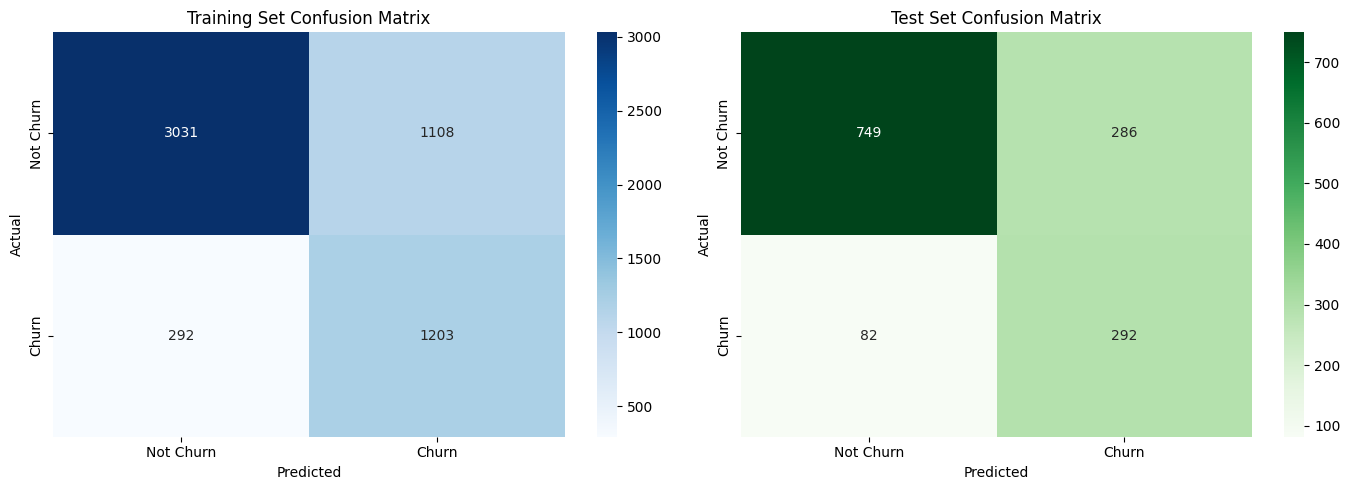


Test Set Confusion Matrix Breakdown:
True Negatives (Correct Not Churn): 749
False Positives (Predicted Churn, Actually Not): 286
False Negatives (Predicted Not Churn, Actually Churn): 82
True Positives (Correct Churn): 292


In [42]:
# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
print("\nTest Set Confusion Matrix Breakdown:")
tn, fp, fn, tp = cm_test.ravel()
print(f"True Negatives (Correct Not Churn): {tn}")
print(f"False Positives (Predicted Churn, Actually Not): {fp}")
print(f"False Negatives (Predicted Not Churn, Actually Churn): {fn}")
print(f"True Positives (Correct Churn): {tp}")

In [43]:
# Generate classification report
print("="*50)
print("CLASSIFICATION REPORT - TRAINING SET")
print("="*50)
print(classification_report(y_train, y_train_pred,
                          target_names=['Not Churn', 'Churn']))

print("\n" + "="*50)
print("CLASSIFICATION REPORT - TEST SET")
print("="*50)
print(classification_report(y_test, y_test_pred,
                          target_names=['Not Churn', 'Churn']))

# Calculate individual metrics for test set
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\n" + "="*50)
print("KEY METRICS (TEST SET)")
print("="*50)
print(f"Precision: {precision:.4f} - Of predicted churners, {precision*100:.2f}% actually churned")
print(f"Recall: {recall:.4f} - We caught {recall*100:.2f}% of all actual churners")
print(f"F1-Score: {f1:.4f} - Harmonic mean of Precision and Recall")

CLASSIFICATION REPORT - TRAINING SET
              precision    recall  f1-score   support

   Not Churn       0.91      0.73      0.81      4139
       Churn       0.52      0.80      0.63      1495

    accuracy                           0.75      5634
   macro avg       0.72      0.77      0.72      5634
weighted avg       0.81      0.75      0.76      5634


CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

   Not Churn       0.90      0.72      0.80      1035
       Churn       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


KEY METRICS (TEST SET)
Precision: 0.5052 - Of predicted churners, 50.52% actually churned
Recall: 0.7807 - We caught 78.07% of all actual churners
F1-Score: 0.6134 - Harmonic mean of Precision and Recall


In [49]:
# Create a comprehensive summary
print("="*60)
print("CENTRALIZED LOGISTIC REGRESSION - FINAL SUMMARY")
print("="*60)

summary = {
    'Metric': [
        'Training Accuracy',
        'Test Accuracy',
        'Precision',
        'Recall',
        'F1-Score',
        'ROC-AUC Score',
        'True Positives',
        'True Negatives',
        'False Positives',
        'False Negatives'
    ],
    'Value': [
        f"{train_accuracy:.4f}",
        f"{test_accuracy:.4f}",
        f"{precision:.4f}",
        f"{recall:.4f}",
        f"{f1:.4f}",
        f"{test_auc:.4f}",
        f"{tp}",
        f"{tn}",
        f"{fp}",
        f"{fn}"
    ]
}

summary_df = pd.DataFrame(summary)
print(summary_df.to_string(index=False))

print("\n" + "="*60)
print("BUSINESS INSIGHTS")
print("="*60)
print(f"• Out of {len(y_test)} test customers:")
print(f"  - {tp} churners were correctly identified ({recall*100:.1f}% catch rate)")
print(f"  - {fn} churners were missed ({fn/(tp+fn)*100:.1f}% miss rate)")
print(f"  - {fp} false alarms (predicted churn but didn't)")
print(f"  - {tn} correctly identified as staying")
print(f"\n• Model Confidence: {test_auc*100:.1f}% AUC Score")

CENTRALIZED LOGISTIC REGRESSION - FINAL SUMMARY
           Metric  Value
Training Accuracy 0.7515
    Test Accuracy 0.7388
        Precision 0.5052
           Recall 0.7807
         F1-Score 0.6134
    ROC-AUC Score 0.8412
   True Positives    292
   True Negatives    749
  False Positives    286
  False Negatives     82

BUSINESS INSIGHTS
• Out of 1409 test customers:
  - 292 churners were correctly identified (78.1% catch rate)
  - 82 churners were missed (21.9% miss rate)
  - 286 false alarms (predicted churn but didn't)
  - 749 correctly identified as staying

• Model Confidence: 84.1% AUC Score


In [36]:
import pickle

# Saving the trained model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

# Saving the scaler (you'll need this for new predictions)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("✓ Model and scaler saved successfully!")
print("\nSaved files:")
print("• logistic_regression_model.pkl")
print("• scaler.pkl")

✓ Model and scaler saved successfully!

Saved files:
• logistic_regression_model.pkl
• scaler.pkl
